# 📥 Load and Prepare O*NET Technology and Tools Data

In [1]:
import pandas as pd
import os

data_dir = "../data/o_net_tools_tech/"
# Load from Excel

tools_file = "Tools Used.xlsx"
tech_file = "Technology Skills.xlsx"

# Load Excel files
tech_df = pd.read_excel(os.path.join(data_dir, tech_file))
tools_df = pd.read_excel(os.path.join(data_dir, tools_file))

# Add identifier column
tech_df['Entity_Type'] = 'Technology'
tools_df['Entity_Type'] = 'Tool'

In [2]:
# Check dataset summaries and structure
print ("tech df:", tech_df.info())
print ("tools df:", tools_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32627 entries, 0 to 32626
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   O*NET-SOC Code   32627 non-null  object
 1   Title            32627 non-null  object
 2   Example          32627 non-null  object
 3   Commodity Code   32627 non-null  int64 
 4   Commodity Title  32627 non-null  object
 5   Hot Technology   32627 non-null  object
 6   In Demand        32627 non-null  object
 7   Entity_Type      32627 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB
tech df: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41662 entries, 0 to 41661
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   O*NET-SOC Code   41662 non-null  object
 1   Title            41662 non-null  object
 2   Example          41662 non-null  object
 3   Commodity Code   41662 non-null  int64 


# 📄 Load and Filter Resume Data

In [3]:
# lets pick a resume
resume_df = pd.read_csv("../data/annotations_scenario_1/cleaned_resumes.csv")

# Select resume labeled for 'data science' role
data_science_resume = resume_df[resume_df['original_job'].str.lower() == "data science"]

# Display the result
# Extract the first matching resume text
first_ds_resume = data_science_resume.iloc[0]

# Extract the resume text
resume_text = first_ds_resume['resume_text']

# Show a short preview of the resume for verification
print(resume_text[:1000])  # show first 1000 characters

Education Details B. Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy- Exprience - Less than 1 year months Machine Learning- Exprience - Less than 1 year months Tensorflow- Exprience - Less than 1 year months Scikit- Exprience - Less than 1 year months Python- Exprience - Less than 1 year months GCP- Exprience - Less than 1 year months Pandas- Exprience - Less than 1 year months Neural Network- Exprience - Less than 1 year monthsCompany Details company - Wipro description - Bhawana Aggarwal E-Mail:bhawana. chd@gmail. com Phone: 09876971076 VVersatile, high-energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning, Deep Learning, Data Science, Python, Software Development. Skilled in managing end-to-end development and software products / projects from inception, requirement specs, planning, designing, i

In [23]:
resume_df.columns

Index(['resume_id', 'resume_text', 'original_job', 'annotation_1',
       'annotation_2'],
      dtype='object')

In [4]:
# Check CUDA availability
import torch
from sentence_transformers import SentenceTransformer
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load model to CUDA
model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

Using device: cuda


In [5]:
from textblob import TextBlob

blob = TextBlob(resume_text)

# Inspecting basic information
print(f"Text length: {len(blob.words)} words")
print(f"Sentences count: {len(blob.sentences)}")

Text length: 1120 words
Sentences count: 59


In [6]:
noun_phrases = blob.noun_phrases
print(f"Noun phrases found ({len(noun_phrases)}):\n")
for np in noun_phrases[:20]:
    print("-", np)

Noun phrases found (335):

- details
- tech rayat
- bahra
- engineering
- biotechnology data
- data
- skill details numpy- exprience
- less
- year months
- machine learning- exprience
- less
- year months
- tensorflow- exprience
- less
- year months
- scikit- exprience
- less
- year months
- python- exprience
- less


In [7]:
# lets pick a resume
resume_df = pd.read_csv("../data/annotations_scenario_1/cleaned_resumes.csv")

In [8]:

# Filter for resume with original_job = "data science"
data_science_resume = resume_df[resume_df['original_job'].str.lower() == "data science"]

# Display the result
# Take the first matching resume for "data science"
first_ds_resume = data_science_resume.iloc[0]

# Extract the resume text
resume_text = first_ds_resume['resume_text']

# Optional: show a preview of the text
print(resume_text[:1000])  # show first 1000 characters



Education Details B. Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy- Exprience - Less than 1 year months Machine Learning- Exprience - Less than 1 year months Tensorflow- Exprience - Less than 1 year months Scikit- Exprience - Less than 1 year months Python- Exprience - Less than 1 year months GCP- Exprience - Less than 1 year months Pandas- Exprience - Less than 1 year months Neural Network- Exprience - Less than 1 year monthsCompany Details company - Wipro description - Bhawana Aggarwal E-Mail:bhawana. chd@gmail. com Phone: 09876971076 VVersatile, high-energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning, Deep Learning, Data Science, Python, Software Development. Skilled in managing end-to-end development and software products / projects from inception, requirement specs, planning, designing, i

In [9]:
from textblob import TextBlob

# Extract noun phrases from the selected resume
blob = TextBlob(resume_text)
noun_phrases = list(set(blob.noun_phrases))  # remove duplicates for efficiency

# Embed noun phrases
nounphrase_embeddings = model.encode(noun_phrases, batch_size=32, convert_to_numpy=True, show_progress_bar=True)

# Create DataFrame
nounphrase_df = pd.DataFrame({
    'noun_phrase': noun_phrases,
    'embedding': list(nounphrase_embeddings)
})


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import torch

# -------------------------------
# 1. Load Model on GPU
# -------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

# -------------------------------
# 2. Load Tools and Tech Data
# -------------------------------
tools_df = pd.read_excel("../data/o_net_tools_tech/Tools Used.xlsx")
tech_df = pd.read_excel("../data/o_net_tools_tech/Technology Skills.xlsx")

# -------------------------------
# 3. Clean Text Columns
# -------------------------------
tools_df = tools_df.dropna(subset=['Example'])
tools_df['tool_example'] = tools_df['Example'].astype(str)

tech_df = tech_df.dropna(subset=['Example'])
tech_df['tech_example'] = tech_df['Example'].astype(str)

# -------------------------------
# 4. Batch Encode Tool Examples
# -------------------------------
tool_texts = tools_df['tool_example'].tolist()

print("Encoding Tools...")
tool_embeddings = model.encode(
    tool_texts,
    batch_size=64,                    # Adjust based on GPU memory
    convert_to_numpy=True,
    show_progress_bar=True
)
tools_df['embedding'] = list(tool_embeddings)

# -------------------------------
# 5. Batch Encode Tech Examples
# -------------------------------
tech_texts = tech_df['tech_example'].tolist()

print("Encoding Technology Skills...")
tech_embeddings = model.encode(
    tech_texts,
    batch_size=64,
    convert_to_numpy=True,
    show_progress_bar=True
)
tech_df['embedding'] = list(tech_embeddings)

# -------------------------------
# 6. Final Check
# -------------------------------
print(f"Encoded {len(tools_df)} tools and {len(tech_df)} technology skills.")


Using device: cuda
Encoding Tools...


Batches:   0%|          | 0/651 [00:00<?, ?it/s]

Encoding Technology Skills...


Batches:   0%|          | 0/510 [00:00<?, ?it/s]

Encoded 41662 tools and 32627 technology skills.


In [11]:
tech_df.head()

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology,In Demand,tech_example,embedding
0,11-1011.00,Chief Executives,Adobe Acrobat,43232202,Document management software,Y,N,Adobe Acrobat,"[-0.09180075, 0.0021334619, -0.13546862, 0.008..."
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N,N,AdSense Tracker,"[-0.070951834, -0.03741923, -0.045952767, 0.04..."
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y,N,Atlassian JIRA,"[-0.1495522, -0.015270967, -0.039499376, -0.03..."
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,N,N,Blackbaud The Raiser's Edge,"[-0.1006839, 0.03715423, -0.096757166, 0.00728..."
4,11-1011.00,Chief Executives,ComputerEase construction accounting software,43231601,Accounting software,N,N,ComputerEase construction accounting software,"[-0.07286814, 0.07547406, -0.0423134, -0.01320..."


In [12]:
# Rename for Tools
if 'O*NET-SOC Code' in tools_df.columns:
    tools_df = tools_df.rename(columns={'O*NET-SOC Code': 'onetsoc_code'})

# Rename for Technology
if 'O*NET-SOC Code' in tech_df.columns:
    tech_df = tech_df.rename(columns={'O*NET-SOC Code': 'onetsoc_code'})


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# --------------------------------------------
# Step 1: Prepare Resume Embedding Matrix
# --------------------------------------------
# Stack noun phrase embeddings into a NumPy array
np_embeddings = np.vstack(nounphrase_df['embedding'].values)

# --------------------------------------------
# Step 2: Match Tools Used to Resume
# --------------------------------------------
tool_matches = []

for idx, row in tools_df.rename(columns={'O*NET-SOC Code': 'onetsoc_code'}).iterrows():
    tool_name = str(row['tool_example'])
    tool_embedding = row['embedding']
    job_code = row['onetsoc_code']

    # Compute cosine similarity with all noun phrases
    similarities = cosine_similarity([tool_embedding], np_embeddings)[0]
    max_score = similarities.max()

    if max_score >= 0.65:
        matched_idx = similarities.argmax()
        tool_matches.append({
            'onetsoc_code': job_code,
            'tool_example': tool_name,
            'matched_noun': nounphrase_df.iloc[matched_idx]['noun_phrase'],
            'similarity': max_score,
            'tool_score': 1.0  # Per paper: binary match
        })

tools_matched_df = pd.DataFrame(tool_matches)

# --------------------------------------------
# Step 3: Match Technology Skills to Resume
# --------------------------------------------
tech_matches = []

for idx, row in tech_df.rename(columns={'O*NET-SOC Code': 'onetsoc_code'}).iterrows():
    tech_name = str(row['tech_example'])
    tech_embedding = row['embedding']
    job_code = row['onetsoc_code']
    is_hot = row.get('hot_technology', 'N')

    # Compute cosine similarity with all noun phrases
    similarities = cosine_similarity([tech_embedding], np_embeddings)[0]
    max_score = similarities.max()

    if max_score >= 0.65:
        matched_idx = similarities.argmax()
        tech_score = 1.0 if is_hot == 'Y' else 0.75
        tech_matches.append({
            'onetsoc_code': job_code,
            'tech_example': tech_name,
            'matched_noun': nounphrase_df.iloc[matched_idx]['noun_phrase'],
            'similarity': max_score,
            'tech_score': tech_score
        })

tech_matched_df = pd.DataFrame(tech_matches)

# --------------------------------------------
# Step 4: Aggregate Scores by Job
# --------------------------------------------
tool_scores_by_job = tools_matched_df.groupby('onetsoc_code')['tool_score'].sum().reset_index()
tech_scores_by_job = tech_matched_df.groupby('onetsoc_code')['tech_score'].sum().reset_index()

# Merge both scores by job code
job_tech_tool_scores = pd.merge(tool_scores_by_job, tech_scores_by_job, on='onetsoc_code', how='outer').fillna(0)

# Compute total score (tool + tech)
job_tech_tool_scores['total_score'] = job_tech_tool_scores['tool_score'] + job_tech_tool_scores['tech_score']

# --------------------------------------------
# Step 5: Show Top Matching Jobs
# --------------------------------------------
job_tech_tool_scores = job_tech_tool_scores.sort_values(by='total_score', ascending=False)
display(job_tech_tool_scores.head(10))


,onetsoc_code,tool_score,tech_score,total_score
117,15-1252.00,2.0,23.25,25.25
118,15-1253.00,5.0,18.00,23.00
113,15-1243.00,3.0,18.75,21.75
112,15-1242.00,2.0,19.50,21.50
104,15-1211.00,2.0,18.00,20.00
129,15-1299.08,4.0,15.75,19.75
130,15-1299.09,4.0,13.50,17.50
77,13-1111.00,3.0,14.25,17.25
110,15-1241.00,4.0,12.75,16.75
120,15-1255.00,3.0,13.50,16.50


In [14]:
# Total required tools/tech per job (from O*NET, before matching)
total_tools_by_job = tools_df.groupby('onetsoc_code')['tool_example'].nunique().reset_index(name='total_tools')
total_tech_by_job = tech_df.groupby('onetsoc_code')['tech_example'].nunique().reset_index(name='total_tech')
matched_tools_count = tools_matched_df.groupby('onetsoc_code')['tool_example'].nunique().reset_index(name='matched_tools')
matched_tech_count = tech_matched_df.groupby('onetsoc_code')['tech_example'].nunique().reset_index(name='matched_tech')


In [15]:
# Start with scores
analytics_df = job_tech_tool_scores.copy()

# Merge in matched counts
analytics_df = analytics_df.merge(matched_tools_count, on='onetsoc_code', how='left').fillna(0)
analytics_df = analytics_df.merge(matched_tech_count, on='onetsoc_code', how='left').fillna(0)

# Merge in totals for normalization
analytics_df = analytics_df.merge(total_tools_by_job, on='onetsoc_code', how='left').fillna(0)
analytics_df = analytics_df.merge(total_tech_by_job, on='onetsoc_code', how='left').fillna(0)

# Calculate percentage match
analytics_df['tool_coverage_pct'] = (analytics_df['matched_tools'] / analytics_df['total_tools']).replace([np.inf, np.nan], 0)
analytics_df['tech_coverage_pct'] = (analytics_df['matched_tech'] / analytics_df['total_tech']).replace([np.inf, np.nan], 0)


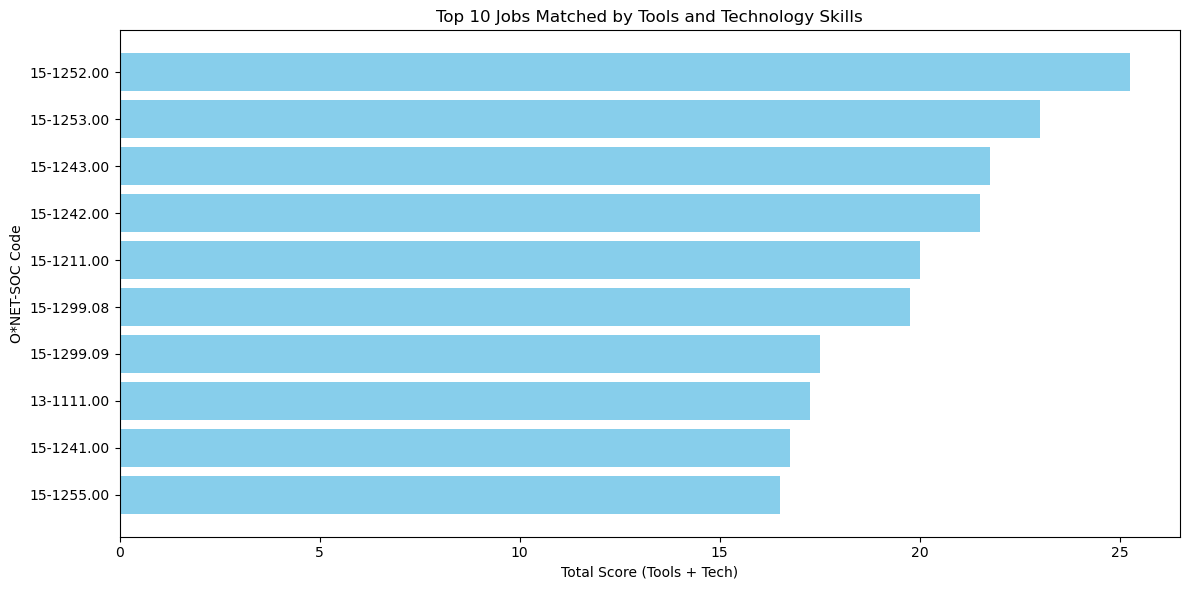

In [16]:
import matplotlib.pyplot as plt

# Top 10 jobs by total score
top_jobs = analytics_df.sort_values(by='total_score', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_jobs['onetsoc_code'], top_jobs['total_score'], color='skyblue')
plt.xlabel("Total Score (Tools + Tech)")
plt.ylabel("O*NET-SOC Code")
plt.title("Top 10 Jobs Matched by Tools and Technology Skills")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [17]:
# Add a 'source' tag to differentiate
tools_matched_df['source'] = 'Tool'
tech_matched_df['source'] = 'Tech'

# Standardize column names for merge
tools_matched_df = tools_matched_df.rename(columns={
    'tool_example': 'entity_example',
    'tool_score': 'score'
})

tech_matched_df = tech_matched_df.rename(columns={
    'tech_example': 'entity_example',
    'tech_score': 'score'
})

# Combine
combined_matches_df = pd.concat([tools_matched_df, tech_matched_df], ignore_index=True)


In [18]:
# Group by matched noun
top_hit_terms = combined_matches_df.groupby('matched_noun').agg(
    match_count=('onetsoc_code', 'count'),
    total_score=('score', 'sum'),
    top_examples=('entity_example', lambda x: list(x.unique())[:3])  # sample top matches
).reset_index()

# Sort by total score or match count
top_hit_terms = top_hit_terms.sort_values(by='total_score', ascending=False)

# Show top 10 resume phrases that had highest overall impact
display(top_hit_terms.head(10))


,matched_noun,match_count,total_score,top_examples
3,computer,1651,1651.00,"[Desktop computers, Laptop computers, Personal..."
29,software,1062,796.50,"[Microsoft Office software, Salesforce softwar..."
19,oracle,517,387.75,"[Oracle PeopleSoft, Oracle Database, Oracle El..."
36,windows,274,205.50,"[Microsoft Windows, Microsoft Windows XP, Micr..."
12,linux,210,157.50,"[Linux, UNIX]"
17,notebooks,146,146.00,"[Notebook computers, Dell Notebooks]"
24,python,131,98.25,[Python]
2,c++,110,82.50,[C++]
21,phone,41,41.00,"[Smartphones, Cell phones, Mobile phones]"
14,mysql,50,37.50,[MySQL]


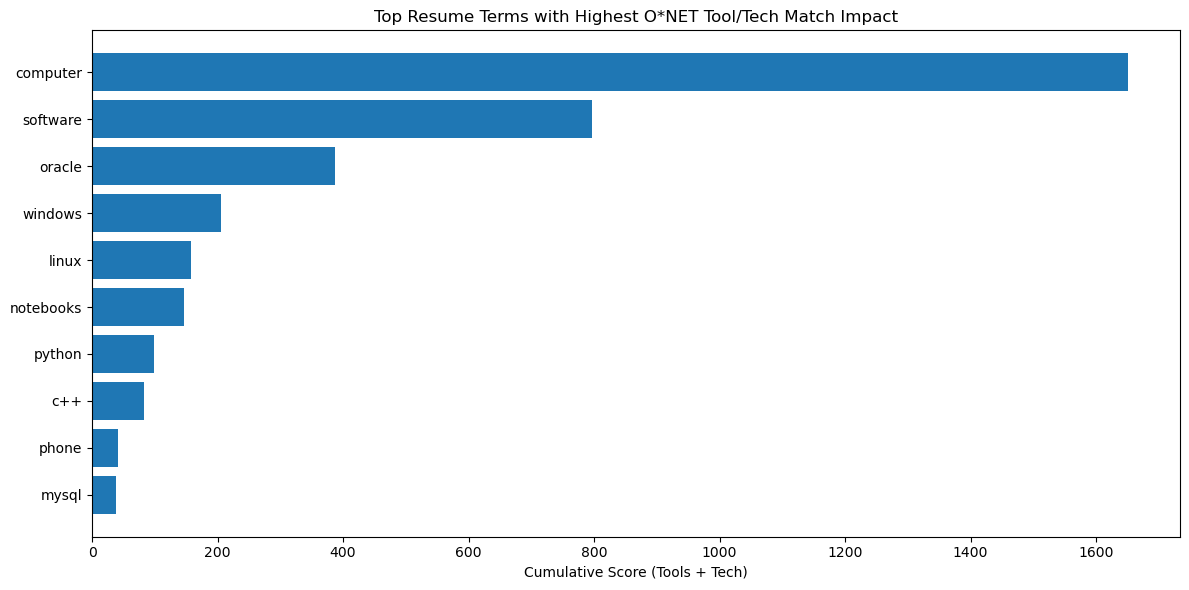

In [19]:
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(12,6))
plt.barh(top_hit_terms['matched_noun'].head(top_n)[::-1], top_hit_terms['total_score'].head(top_n)[::-1])
plt.xlabel("Cumulative Score (Tools + Tech)")
plt.title("Top Resume Terms with Highest O*NET Tool/Tech Match Impact")
plt.tight_layout()
plt.show()


In [20]:
job_tech_tool_scores.head()

,onetsoc_code,tool_score,tech_score,total_score
117,15-1252.00,2.0,23.25,25.25
118,15-1253.00,5.0,18.00,23.00
113,15-1243.00,3.0,18.75,21.75
112,15-1242.00,2.0,19.50,21.50
104,15-1211.00,2.0,18.00,20.00


In [21]:
tools_matched_df.head()

,onetsoc_code,entity_example,matched_noun,similarity,score,source
0,11-1011.00,Desktop computers,computer,0.743580,1.0,Tool
1,11-1011.00,Laptop computers,computer,0.678605,1.0,Tool
2,11-1011.00,Personal computers,computer,0.761953,1.0,Tool
3,11-1011.00,Smartphones,phone,0.700859,1.0,Tool
4,11-1011.03,Desktop computers,computer,0.743580,1.0,Tool


In [22]:
tech_matched_df.head()

,onetsoc_code,entity_example,matched_noun,similarity,score,source
0,11-1011.00,Microsoft Office software,software,0.650229,0.75,Tech
1,11-1011.00,Oracle PeopleSoft,oracle,0.709405,0.75,Tech
2,11-1011.03,Microsoft Office software,software,0.650229,0.75,Tech
3,11-1011.03,Salesforce software,software,0.820032,0.75,Tech
4,11-1021.00,Microsoft Office software,software,0.650229,0.75,Tech
